In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

### Connecting MongoDB server

In [2]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [3]:
mongo_db = mongo_conn['spearmint']

### Loading document from database

In [4]:
collection_list = mongo_db.list_collection_names()

In [5]:
exp_name = "sep_drop_wave"

In [6]:
jobs_initial5_Mk10_Mj1_exp = []
jobs_initial5_Mk20_Mj1_exp = []
jobs_initial5_Mk30_Mj1_exp = []
jobs_initial5_Mk50_Mj1_exp = []

jobs_initial5_Mk200_Mj1_exp = []

jobs_initial5_Mk50_Mj1_hyperprior_v2_exp = []
jobs_initial5_Mk200_Mj1_hyperprior_v2_exp = []
jobs_initial5_Mk250_Mj1_hyperprior_v2_exp = []

jobs_saa_cumulative_multi_exp = []
jobs_saa_cumulative_exp = []
jobs_saa_cumulative_v2_exp = []

jobs_saa_cumulative_v2_tight_v2_exp = []

jobs_initial5_Mk10_Mj1_EI_exp = []

recomm_initial5_Mk10_Mj1_exp = []
recomm_initial5_Mk20_Mj1_exp = []
recomm_initial5_Mk30_Mj1_exp = []
recomm_initial5_Mk50_Mj1_exp = []

recomm_initial5_Mk200_Mj1_exp = []

recomm_initial5_Mk50_Mj1_hyperprior_v2_exp = []
recomm_initial5_Mk200_Mj1_hyperprior_v2_exp = []
recomm_initial5_Mk250_Mj1_hyperprior_v2_exp = []

recomm_saa_cumulative_multi_exp = []
recomm_saa_cumulative_exp = []
recomm_saa_cumulative_v2_exp = []

recomm_saa_cumulative_v2_tight_v2_exp = []

recomm_initial5_Mk10_Mj1_EI_exp = []

for i in range(25):
    if "%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk10_Mj1_EI.jobs"%(exp_name) in collection_list: jobs_initial5_Mk10_Mj1_EI_exp.append(mongo_db["%s_initial5_Mk10_Mj1_EI.jobs"%(exp_name)]) 
    if "%s_initial5_Mk20_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk20_Mj1_exp.append(mongo_db["%s_initial5_Mk20_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk30_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk30_Mj1_exp.append(mongo_db["%s_initial5_Mk30_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i)])
    
    if "%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i)]) 
        
    if "%s_initial5_Mk50_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk50_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk200_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk200_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk250_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk250_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i)]) 
    
    if "%s_cumulative_saa_multi-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_multi_exp.append(mongo_db["%s_cumulative_saa_multi-%d.jobs"%(exp_name,i)])
    if "%s_cumulative_saa-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_exp.append(mongo_db["%s_cumulative_saa-%d.jobs"%(exp_name,i)])
    if "%s_cumulative_saa_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_v2_exp.append(mongo_db["%s_cumulative_saa_v2-%d.jobs"%(exp_name,i)])
        
    if "%s_cumulative_saa_v2_tight_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_v2_tight_v2_exp.append(mongo_db["%s_cumulative_saa_v2_tight_v2-%d.jobs"%(exp_name,i)])
    
    if "%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk10_Mj1_EI.recommendations"%(exp_name) in collection_list: recomm_initial5_Mk10_Mj1_EI_exp.append(mongo_db["%s_initial5_Mk10_Mj1_EI.recommendations"%(exp_name)]) 
    if "%s_initial5_Mk20_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk20_Mj1_exp.append(mongo_db["%s_initial5_Mk20_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk30_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk30_Mj1_exp.append(mongo_db["%s_initial5_Mk30_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i)])
    
    if "%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i)]) 
            
    if "%s_initial5_Mk50_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk50_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk200_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk200_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk250_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk250_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i)]) 
    
    if "%s_cumulative_saa_multi-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_multi_exp.append(mongo_db["%s_cumulative_saa_multi-%d.recommendations"%(exp_name,i)])
    if "%s_cumulative_saa-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_exp.append(mongo_db["%s_cumulative_saa-%d.recommendations"%(exp_name,i)])
    if "%s_cumulative_saa_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_v2_exp.append(mongo_db["%s_cumulative_saa_v2-%d.recommendations"%(exp_name,i)])
        
    if "%s_cumulative_saa_v2_tight_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_v2_tight_v2_exp.append(mongo_db["%s_cumulative_saa_v2_tight_v2-%d.recommendations"%(exp_name,i)])

In [7]:
for doc in recomm_initial5_Mk10_Mj1_EI_exp[0].find():
    print(compression.decompress_nested_container(doc))

{u'num_complete': 1, u'num_complete_tasks': {u'Objective': 1}, u'total_elapsed_time': 2.0416629314422607, u'params_om': None, u'params': {u'x2': {u'type': u'float', u'values': array([2.39847665])}, u'x1': {u'type': u'float', u'values': array([-0.4243365])}}, u'num_states': None, u'objective': None, u'obj_o': None, u'obj_om': None, u'_id': ObjectId('5f86fd6723294dc28f9f5274'), u'params_o': None, u'id': 0}
{u'num_complete': 2, u'num_complete_tasks': {u'Objective': 2}, u'total_elapsed_time': 4.0660669803619385, u'params_om': None, u'params': {u'x2': {u'type': u'float', u'values': array([-1.92303771])}, u'x1': {u'type': u'float', u'values': array([3.04130094])}}, u'num_states': None, u'objective': None, u'obj_o': None, u'obj_om': None, u'_id': ObjectId('5f86fd6923294dc28f9f5294'), u'params_o': None, u'id': 1}
{u'num_complete': 3, u'num_complete_tasks': {u'Objective': 3}, u'total_elapsed_time': 6.082418918609619, u'params_om': None, u'params': {u'x2': {u'type': u'float', u'values': array([-

In [8]:
hypers_initial5_Mk10_Mj1_EI = []
hypers_initial5_Mk10_Mj1_EI.append(mongo_db["%s_initial5_Mk10_Mj1_EI.hypers"%(exp_name)])

In [9]:
for doc in hypers_initial5_Mk10_Mj1_EI[0].find():
    print(compression.decompress_nested_container(doc))

{u'Objective': {u'chain length': 220, u'hypers': {u'betawarp_beta': array([3.83837477, 3.22638172]), u'amp2': 2.3941944071747017, u'mean': -0.20797986059018572, u'ls': array([1.08792751, 0.1534051 ]), u'betawarp_alpha': array([3.11474113, 4.24204802])}}, u'_id': ObjectId('5f86fd8823294dc28f9f53a7')}


### Get objective method gets the predicted optimal value in GP model

In [10]:
initial5_Mk10_Mj1_objs = functions.get_objective(recomm_initial5_Mk10_Mj1_exp)
initial5_Mk20_Mj1_objs = functions.get_objective(recomm_initial5_Mk20_Mj1_exp)
initial5_Mk30_Mj1_objs = functions.get_objective(recomm_initial5_Mk30_Mj1_exp)
initial5_Mk50_Mj1_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_exp)
initial5_Mk200_Mj1_objs = functions.get_objective(recomm_initial5_Mk200_Mj1_exp)


#initial5_Mk50_Mj1_hyperprior_v2_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_hyperprior_v2_exp)
#initial5_Mk200_Mj1_hyperprior_v2_objs = functions.get_objective(recomm_initial5_Mk200_Mj1_hyperprior_v2_exp)
#initial5_Mk250_Mj1_hyperprior_v2_objs = functions.get_objective(recomm_initial5_Mk250_Mj1_hyperprior_v2_exp)

#saa_cumulative_multi = functions.get_objective(recomm_saa_cumulative_multi_exp)
#saa_cumulative = functions.get_objective(recomm_saa_cumulative_exp)
#saa_cumulative_v2 = functions.get_objective(recomm_saa_cumulative_v2_exp)
saa_cumulative_v2_tight_v2 = functions.get_objective(recomm_saa_cumulative_v2_tight_v2_exp)

In [11]:
locs_initial5_Mk10_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk10_Mj1_exp)
locs_initial5_Mk20_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk20_Mj1_exp)
locs_initial5_Mk30_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk30_Mj1_exp)
locs_initial5_Mk50_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_exp)
locs_initial5_Mk200_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk200_Mj1_exp)


#locs_initial5_Mk50_Mj1_hyperprior_v2_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_hyperprior_v2_exp)
#locs_initial5_Mk200_Mj1_hyperprior_v2_exp = functions.get_recomm_loc(recomm_initial5_Mk200_Mj1_hyperprior_v2_exp)
#locs_initial5_Mk250_Mj1_hyperprior_v2_exp = functions.get_recomm_loc(recomm_initial5_Mk250_Mj1_hyperprior_v2_exp)

#locs_saa_cumulative_multi = functions.get_recomm_loc(recomm_saa_cumulative_multi_exp)
#locs_saa_cumulative = functions.get_recomm_loc(recomm_saa_cumulative_exp)
#locs_saa_cumulative_v2 = functions.get_recomm_loc(recomm_saa_cumulative_v2_exp)
locs_saa_cumulative_v2_tight_v2 = functions.get_recomm_loc(recomm_saa_cumulative_v2_tight_v2_exp)

### Getting immediate Regret IR measure

In [12]:
def drop_wave(x1,x2):
	numerator = 1 + np.cos(12*((x1**2 + x2**2)**0.5))
	delimiter = 0.5 * (x1**2 + x2**2) + 2

	result = - numerator / delimiter

	return result


In [13]:
opt_val = -1

In [14]:
func = drop_wave

In [15]:
def get_sugg_obj_exp(locs_exp):
    obj_exp = []
    for exp_num in range(len(locs_exp)):
        objs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[exp_num])):
            objs_iter.append(func(*locs_cur_exp[idx]))
            
        obj_exp.append(objs_iter)
        
    return obj_exp

In [16]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - func(*input_list)))

In [17]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[0])):
            
            irs_iter.append(log_ir(locs_cur_exp[idx]))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [18]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs


In [19]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs



In [20]:
def get_std_err_irs(irs_exp):
    std_err_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        std_err_irs.append(np.std(cur_iter_irs))
        
    return std_err_irs

In [21]:
minimum = 35
for exp in locs_saa_cumulative_v2_tight_v2:
    minimum = minimum if len(exp) > minimum else len(exp)
    
locs_saa_cumulative_v2_tight_v2 = [list_[:minimum] for list_ in locs_saa_cumulative_v2_tight_v2]

### Getting the 'real' value of functions at suggested locations

In [22]:
sugg_obj_initial5_Mk10_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk10_Mj1_exp)
sugg_obj_initial5_Mk20_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk20_Mj1_exp)
sugg_obj_initial5_Mk30_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk30_Mj1_exp)
sugg_obj_initial5_Mk50_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_exp)

sugg_obj_initial5_Mk200_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk200_Mj1_exp)


# sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_hyperprior_v2_exp)
# sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_exp = get_sugg_obj_exp(locs_initial5_Mk200_Mj1_hyperprior_v2_exp)
# sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_exp = get_sugg_obj_exp(locs_initial5_Mk250_Mj1_hyperprior_v2_exp)

# sugg_obj_cumulative_saa_multi_exp = get_sugg_obj_exp(locs_saa_cumulative_multi)
# sugg_obj_cumulative_saa_exp = get_sugg_obj_exp(locs_saa_cumulative)
# sugg_obj_cumulative_saa_v2_exp = get_sugg_obj_exp(locs_saa_cumulative_v2)

sugg_obj_cumulative_saa_v2_tight_v2_exp = get_sugg_obj_exp(locs_saa_cumulative_v2_tight_v2)

#### Averaging values of each experiments

In [23]:
avg_sugg_obj_initial5_Mk10_Mj1 = np.average(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk20_Mj1 = np.average(sugg_obj_initial5_Mk20_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk30_Mj1 = np.average(sugg_obj_initial5_Mk30_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk50_Mj1 = np.average(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)

avg_sugg_obj_initial5_Mk200_Mj1 = np.average(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)


# avg_sugg_obj_initial5_Mk50_Mj1_hyperprior_v2 = np.average(sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_exp, axis=0)
# avg_sugg_obj_initial5_Mk200_Mj1_hyperprior_v2 = np.average(sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_exp, axis=0)
# avg_sugg_obj_initial5_Mk250_Mj1_hyperprior_v2 = np.average(sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_exp, axis=0)

# avg_sugg_obj_saa_cumulative_multi = np.average(sugg_obj_cumulative_saa_multi_exp, axis=0)
# avg_sugg_obj_saa_cumulative = np.average(sugg_obj_cumulative_saa_exp, axis=0)
# avg_sugg_obj_saa_cumulative_v2 = np.average(sugg_obj_cumulative_saa_v2_exp, axis=0)
avg_sugg_obj_saa_cumulative_v2_tight_v2 = np.average(sugg_obj_cumulative_saa_v2_tight_v2_exp, axis=0)

In [24]:
sugg_obj_initial5_Mk10_Mj1_std_err = np.std(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
sugg_obj_initial5_Mk20_Mj1_std_err = np.std(sugg_obj_initial5_Mk20_Mj1_exp, axis=0)
sugg_obj_initial5_Mk30_Mj1_std_err = np.std(sugg_obj_initial5_Mk30_Mj1_exp, axis=0)
sugg_obj_initial5_Mk50_Mj1_std_err = np.std(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)

sugg_obj_initial5_Mk200_Mj1_std_err = np.std(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)


# sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_std_err = np.std(sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_exp, axis=0)
# sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_std_err = np.std(sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_exp, axis=0)
# sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_std_err = np.std(sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_exp, axis=0)

# sugg_obj_cumulative_saa_multi_std_err = np.std(sugg_obj_cumulative_saa_multi_exp, axis=0)
# sugg_obj_cumulative_saa_std_err = np.std(sugg_obj_cumulative_saa_exp, axis=0)
# sugg_obj_cumulative_saa_v2_std_err = np.std(sugg_obj_cumulative_saa_v2_exp, axis=0)
sugg_obj_cumulative_saa_v2_tight_v2_std_err = np.std(sugg_obj_cumulative_saa_v2_tight_v2_exp, axis=0)

### Getting IR values for look optimization performances

In [25]:
irs_initial5_Mk10_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk20_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk20_Mj1_exp)
irs_initial5_Mk30_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk30_Mj1_exp)
irs_initial5_Mk50_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_exp)

irs_initial5_Mk200_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk200_Mj1_exp)


# irs_initial5_Mk50_Mj1_hyperprior_v2_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_hyperprior_v2_exp)
# irs_initial5_Mk200_Mj1_hyperprior_v2_exp = get_irs_whole_exp(locs_initial5_Mk200_Mj1_hyperprior_v2_exp)
# irs_initial5_Mk250_Mj1_hyperprior_v2_exp = get_irs_whole_exp(locs_initial5_Mk250_Mj1_hyperprior_v2_exp)

# irs_cumulative_saa_multi_exp = get_irs_whole_exp(locs_saa_cumulative_multi)
# irs_cumulative_saa_exp = get_irs_whole_exp(locs_saa_cumulative)
# irs_cumulative_saa_v2_exp = get_irs_whole_exp(locs_saa_cumulative_v2)
irs_cumulative_saa_v2_tight_v2_exp = get_irs_whole_exp(locs_saa_cumulative_v2_tight_v2)

### Get averaged and median value of IR

In [26]:
irs_initial5_Mk10_Mj1_avg = get_avg_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk20_Mj1_avg = get_avg_irs(irs_initial5_Mk20_Mj1_exp)
irs_initial5_Mk30_Mj1_avg = get_avg_irs(irs_initial5_Mk30_Mj1_exp)
irs_initial5_Mk50_Mj1_avg = get_avg_irs(irs_initial5_Mk50_Mj1_exp)

irs_initial5_Mk200_Mj1_avg = get_avg_irs(irs_initial5_Mk200_Mj1_exp)


# irs_initial5_Mk50_Mj1_hyperprior_v2_avg = get_avg_irs(irs_initial5_Mk50_Mj1_hyperprior_v2_exp)
# irs_initial5_Mk200_Mj1_hyperprior_v2_avg = get_avg_irs(irs_initial5_Mk200_Mj1_hyperprior_v2_exp)
# irs_initial5_Mk250_Mj1_hyperprior_v2_avg = get_avg_irs(irs_initial5_Mk250_Mj1_hyperprior_v2_exp)

# irs_cumulative_saa_multi_avg = get_avg_irs(irs_cumulative_saa_multi_exp)
# irs_cumulative_saa_avg = get_avg_irs(irs_cumulative_saa_exp)
# irs_cumulative_saa_v2_avg = get_avg_irs(irs_cumulative_saa_v2_exp)
irs_cumulative_saa_v2_tight_v2_avg = get_avg_irs(irs_cumulative_saa_v2_tight_v2_exp)

In [27]:
irs_initial5_Mk10_Mj1_median = get_median_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk20_Mj1_median = get_median_irs(irs_initial5_Mk20_Mj1_exp)
irs_initial5_Mk30_Mj1_median = get_median_irs(irs_initial5_Mk30_Mj1_exp)
irs_initial5_Mk50_Mj1_median = get_median_irs(irs_initial5_Mk50_Mj1_exp)

irs_initial5_Mk200_Mj1_median = get_median_irs(irs_initial5_Mk200_Mj1_exp)


# irs_initial5_Mk50_Mj1_hyperprior_v2_median = get_median_irs(irs_initial5_Mk50_Mj1_hyperprior_v2_exp)
# irs_initial5_Mk200_Mj1_hyperprior_v2_median = get_median_irs(irs_initial5_Mk200_Mj1_hyperprior_v2_exp)
# irs_initial5_Mk250_Mj1_hyperprior_v2_median = get_median_irs(irs_initial5_Mk250_Mj1_hyperprior_v2_exp)

# irs_saa_cumulative_multi_median = get_median_irs(irs_cumulative_saa_multi_exp)
# irs_saa_cumulative_median = get_median_irs(irs_cumulative_saa_exp)
# irs_saa_cumulative_v2_median = get_median_irs(irs_cumulative_saa_v2_exp)
irs_saa_cumulative_v2_tight_v2_median = get_median_irs(irs_cumulative_saa_v2_tight_v2_exp)

In [28]:
irs_initial5_Mk10_Mj1_std_err = get_std_err_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk20_Mj1_std_err = get_std_err_irs(irs_initial5_Mk20_Mj1_exp)
irs_initial5_Mk30_Mj1_std_err = get_std_err_irs(irs_initial5_Mk30_Mj1_exp)
irs_initial5_Mk50_Mj1_std_err = get_std_err_irs(irs_initial5_Mk50_Mj1_exp)

irs_initial5_Mk200_Mj1_std_err = get_std_err_irs(irs_initial5_Mk200_Mj1_exp)


# irs_cumulative_saa_multi_std_err = get_std_err_irs(irs_cumulative_saa_multi_exp)
# irs_cumulative_saa_std_err = get_std_err_irs(irs_cumulative_saa_exp)
# irs_cumulative_saa_v2_std_err = get_std_err_irs(irs_cumulative_saa_v2_exp)
irs_cumulative_saa_v2_tight_v2_std_err = get_std_err_irs(irs_cumulative_saa_v2_tight_v2_exp)

### Plotting the real function value at suggested location

### Lower Mk version plotting

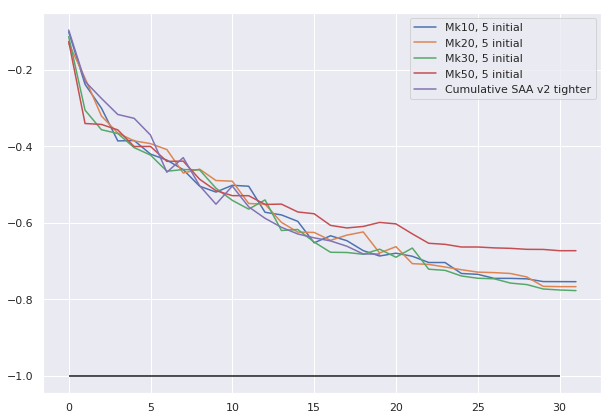

In [36]:
plt.figure(figsize=(10,7))
plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk20_Mj1[3:], label="Mk20, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk30_Mj1[3:], label="Mk30, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")

#plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")
plt.plot(avg_sugg_obj_saa_cumulative_v2_tight_v2[3:], label="Cumulative SAA v2 tighter")
plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
plt.legend()
plt.show()

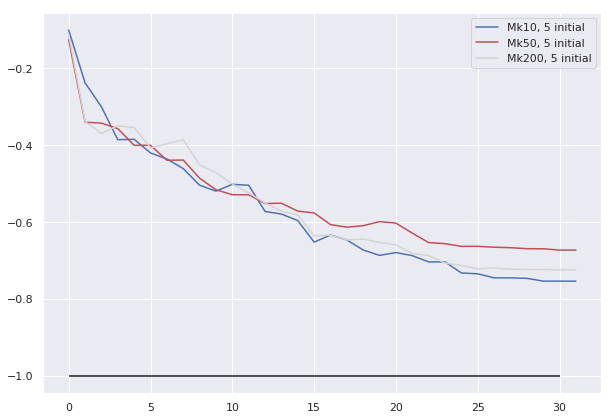

In [39]:
plt.figure(figsize=(10,7))

plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial", color='r')
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial", color='lightgrey')

#plt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial",color='darkgrey')
#plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")

#plt.plot(avg_sugg_obj_saa_cumulative_multi[3:], label="Cumulative SAA")
#plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA, ver2")
#plt.plot(avg_sugg_obj_saa_cumulative_v2_tight_v2[3:], label="Cumulative SAA, ver2, tight v2")
plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
plt.legend()
plt.show()

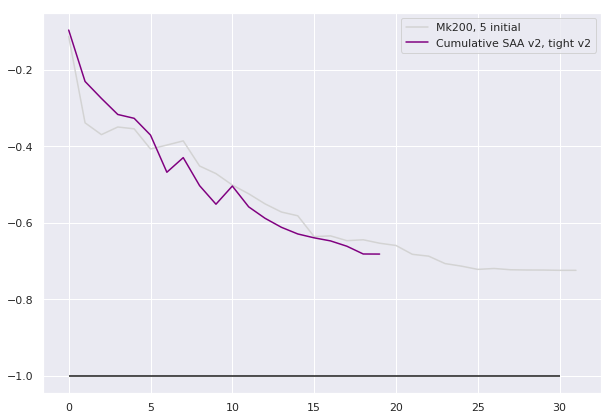

In [41]:
plt.figure(figsize=(10,7))
#plt.plot(avg_sugg_obj_initial5_Mk30_Mj1[3:], label="Mk10, 5 initial")
#plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial", color='r')

#plt.plot(avg_sugg_obj_initial5_Mk150_Mj1[3:], label="Mk150, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial", color='lightgrey')

#plt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial", color='darkgrey')
#plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")
#plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")
plt.plot(avg_sugg_obj_saa_cumulative_v2_tight_v2[3:], label="Cumulative SAA v2, tight v2",color='purple')
#plt.plot(avg_sugg_obj_saa_cumulative_multi[3:], label="SAA cumulative multi start")
#plt.plot(avg_sugg_obj_saa_cumulative[3:], label='SAA cumulative')
plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
plt.legend()
plt.show()

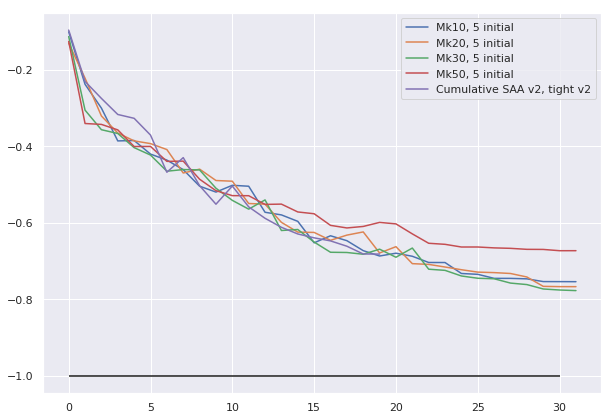

In [29]:
plt.figure(figsize=(10,7))
plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk20_Mj1[3:], label="Mk20, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk30_Mj1[3:], label="Mk30, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")

#plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")

# plt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial")
#plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")
# plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")
plt.plot(avg_sugg_obj_saa_cumulative_v2_tight_v2[3:], label="Cumulative SAA v2, tight v2")

plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
#plt.plot(avg_sugg_obj_saa_cumulative_multi[3:], label="SAA cumulative multi start")
#plt.plot(avg_sugg_obj_saa_cumulative[3:], label='SAA cumulative')
plt.legend()
plt.show()

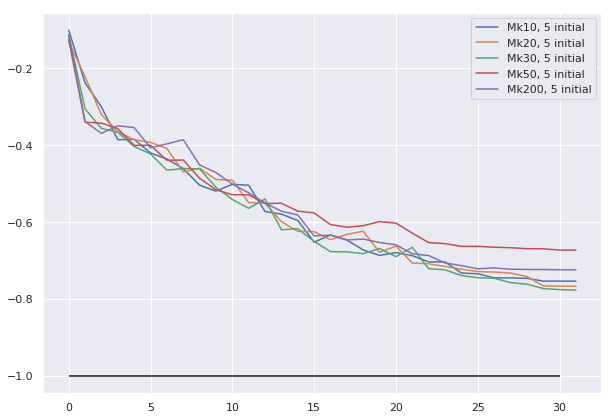

In [34]:
plt.figure(figsize=(10,7))
plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk20_Mj1[3:], label="Mk20, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk30_Mj1[3:], label="Mk30, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")

plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")

# plt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial")
#plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")
# plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")
#plt.plot(avg_sugg_obj_saa_cumulative_v2_tight_v2[3:], label="Cumulative SAA v2, tight v2")

plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
#plt.plot(avg_sugg_obj_saa_cumulative_multi[3:], label="SAA cumulative multi start")
#plt.plot(avg_sugg_obj_saa_cumulative[3:], label='SAA cumulative')
plt.legend()
plt.show()

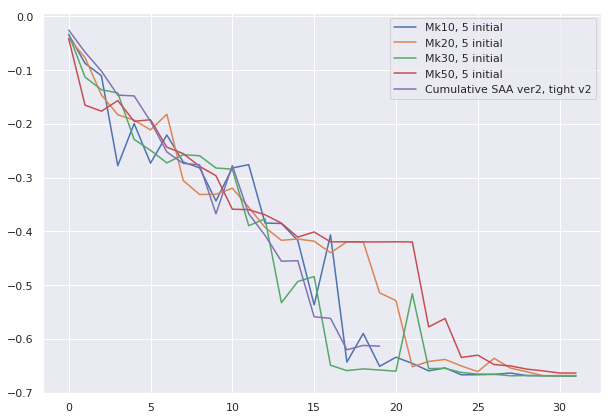

In [30]:
plt.figure(figsize=(10,7))
plt.plot(irs_initial5_Mk10_Mj1_median[3:], label="Mk10, 5 initial")
plt.plot(irs_initial5_Mk20_Mj1_median[3:], label="Mk20, 5 initial")
plt.plot(irs_initial5_Mk30_Mj1_median[3:], label="Mk30, 5 initial")
plt.plot(irs_initial5_Mk50_Mj1_median[3:], label='Mk50, 5 initial')

#plt.plot(irs_initial5_Mk200_Mj1_median[3:], label='Mk200, 5 initial')

# plt.plot(irs_initial5_Mk300_Mj1_median[3:], label='Mk300, 5 initial')
# plt.plot(irs_saa_cumulative_v2_median[3:], label="Cumulative SAA ver2")
plt.plot(irs_saa_cumulative_v2_tight_v2_median[3:], label="Cumulative SAA ver2, tight v2")

plt.legend()
plt.show()

In [31]:
cumulative_saa_tight_v2_mks_exp = functions.get_mks(recomm_saa_cumulative_v2_tight_v2_exp)

In [32]:
avg_tight_v2 = [np.average(mks_exp[4:]) for mks_exp in cumulative_saa_tight_v2_mks_exp]

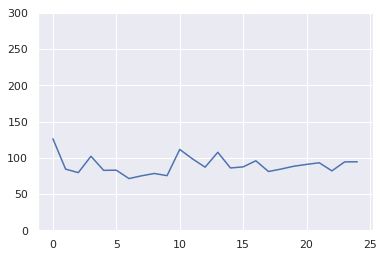

In [33]:
plt.plot(avg_tight_v2)
plt.ylim(ymin=0, ymax = 300)
plt.show()